In [ ]:
import pennylane as qml
import numpy as np
import scipy.linalg as la

In [ ]:
# hbar = w = 1
hbar = 1
w = 1
h =  np.array([[0,0],[0,1]])
I = np.eye(2)
H = np.kron(h,I) +  np.kron(I,h)

In [ ]:
print('The Hamiltonian is - ')
print(H)
l,k = la.eig(H)
print('The eigenvalues of the Hamiltonian are - ')
print(l)
print('The eigenvectors of the Hamiltonian are - ')
print(k)

The Hamiltonian is - 
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]]
The eigenvalues of the Hamiltonian are - 
[0.+0.j 1.+0.j 1.+0.j 2.+0.j]
The eigenvectors of the Hamiltonian are - 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [ ]:
from numpy.linalg import qr

def qr_haar(N):
    """Generate a Haar-random matrix using the QR decomposition."""
    # Step 1
    A, B = np.random.normal(size=(N, N)), np.random.normal(size=(N, N))
    Z = A + 1j * B

    # Step 2
    Q, R = qr(Z)

    # Step 3
    Lambda = np.diag([R[i, i] / np.abs(R[i, i]) for i in range(N)])

    # Step 4
    return np.dot(Q, Lambda)

In [ ]:
dev = qml.device('default.qubit', wires=2) # its a device 'default.qubit' backend in PennyLane is designed for
                                           #pure-state quantum computations.The wires = 2 represents 2 qubits
n = 100 #number of samples being considered
@qml.qnode(dev)
def qr_haar_random_unitary():
    qml.QubitUnitary(qr_haar(4), wires=[0, 1])
    return qml.state()

qr_haar_samples = [qr_haar_random_unitary() for _ in range(n)] # for multiple realisations of haar
                                                                         #random unitaries

In [ ]:
import scipy.linalg as la
import numpy as np
omega_values = np.linspace(np.pi, np.pi/2,100)
omega_values_l = omega_values.tolist()
delta_values = np.linspace(0,1,100)
d = 1 - delta_values

delta_values_l = delta_values.tolist()
a = 1 / (2 * (1 - np.cos(omega_values)))
a_l = a.tolist()
#C_o = np.sqrt(a)
#C_1 = np.sqrt(-2 * delta_values * a * np.cos(omega_values))
#C_2 = np.sqrt(-2 * (1 - delta_values) * a * np.cos(omega_values))
#C_3 = np.sqrt(a)
#C = 2*((C_o)*(C_3) - (C_1)*(C_2))
C = 2*(a_l - (la.expm(1j)*2*a*np.cos(omega_values_l)*np.sqrt(delta_values_l*(1-d))))

In [ ]:
import matplotlib.pyplot as plt
T =[]
for i in a:
    T_Lb =  max((np.pi/2),(np.pi/2)*(1/np.sqrt(2*i)))
    T.append(T_Lb)
t = np.divide(omega_values_l,T)
c = C.tolist()


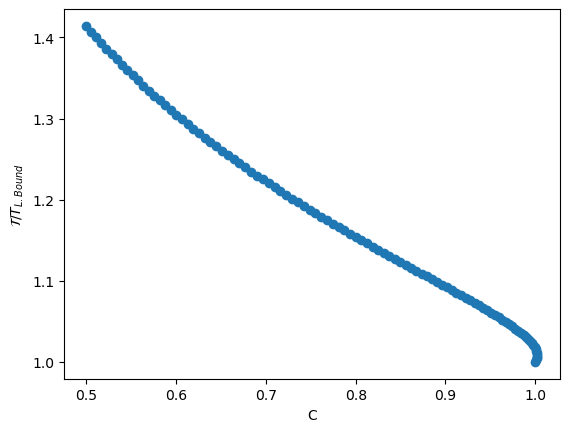

In [ ]:
plt.xlabel('C')
plt.ylabel(r'$\mathcal{T}/T_{L.Bound}$')
plt.scatter(c[0], t)
plt.show()
#plt.ylim(1,1.5)